<a href="https://colab.research.google.com/github/SujinKim1127/Machine-Learning/blob/main/cat_and_dog.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# 데이터셋 다운로드


In [ ]:
!wget --no-check-certificate \
https://storage.googleapis.com/mledu-datasets/cats_and_dogs_filtered.zip \
-O /tmp/cats_and_dogs_filtered.zip

--2021-08-09 01:56:06--  https://storage.googleapis.com/mledu-datasets/cats_and_dogs_filtered.zip
Resolving storage.googleapis.com (storage.googleapis.com)... 108.177.120.128, 142.250.128.128, 142.251.6.128, ...
Connecting to storage.googleapis.com (storage.googleapis.com)|108.177.120.128|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 68606236 (65M) [application/zip]
Saving to: ‘/tmp/cats_and_dogs_filtered.zip’

/tmp/cats_and_dogs_ 100%[===================>]  65.43M   206MB/s    in 0.3s    

2021-08-09 01:56:06 (206 MB/s) - ‘/tmp/cats_and_dogs_filtered.zip’ saved [68606236/68606236]



tmp 폴더에 cats_and_dogs_filtered.zip 파일이 다운로드되어 있는지 확인

cats_and_dogs_filtered 데이터셋은 25,000개의 이미지를 포함하는 원본 Dogs Vs. Cats 데이터셋에서 약 3,000개의 이미지를 추출한 간소화된 버전의 데이터셋

# 압축풀기

In [ ]:
import os
import zipfile

local_zip = '/tmp/cats_and_dogs_filtered.zip'

zip_ref = zipfile.ZipFile(local_zip, 'r')

zip_ref.extractall('/tmp')
zip_ref.close()

# 경로 지정하기

In [ ]:
# 기본 경로
base_dir = '/tmp/cats_and_dogs_filtered'

train_dir = os.path.join(base_dir, 'train')
validation_dir = os.path.join(base_dir, 'validation')

# 훈련에 사용되는 고양이/개 이미지 경로
train_cats_dir = os.path.join(train_dir, 'cats')
train_dogs_dir = os.path.join(train_dir, 'dogs')
print(train_cats_dir)
print(train_dogs_dir)

# 테스트에 사용되는 고양이/개 이미지 경로
validation_cats_dir = os.path.join(validation_dir, 'cats')
validation_dogs_dir = os.path.join(validation_dir, 'dogs')
print(validation_cats_dir)
print(validation_dogs_dir)

/tmp/cats_and_dogs_filtered/train/cats
/tmp/cats_and_dogs_filtered/train/dogs
/tmp/cats_and_dogs_filtered/validation/cats
/tmp/cats_and_dogs_filtered/validation/dogs


# Kaggle Dogs Vs. Cats 데이터셋 살펴보기
파일 이름

In [ ]:
train_cat_fnames = os.listdir( train_cats_dir )
train_dog_fnames = os.listdir( train_dogs_dir )

print(train_cat_fnames[:5])
print(train_dog_fnames[:5])

['cat.507.jpg', 'cat.569.jpg', 'cat.167.jpg', 'cat.101.jpg', 'cat.499.jpg']
['dog.838.jpg', 'dog.235.jpg', 'dog.439.jpg', 'dog.543.jpg', 'dog.344.jpg']


파일 개수 확인

In [ ]:
print('Total training cat images :', len(os.listdir(train_cats_dir)))
print('Total training dog images :', len(os.listdir(train_dogs_dir)))

print('Total validation cat images :', len(os.listdir(validation_cats_dir)))
print('Total validation dog images :', len(os.listdir(validation_dogs_dir)))

Total training cat images : 1000
Total training dog images : 1000
Total validation cat images : 500
Total validation dog images : 500


## 이미지 확인하기

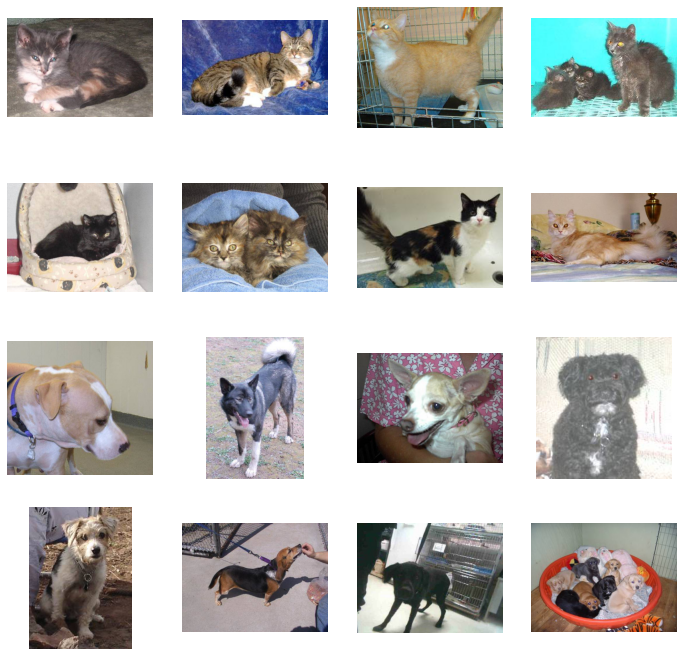

In [ ]:
%matplotlib inline

import matplotlib.image as mpimg
import matplotlib.pyplot as plt

nrows, ncols = 4, 4
pic_index = 0

fig = plt.gcf()
fig.set_size_inches(ncols*3, nrows*3)

pic_index+=8

next_cat_pix = [os.path.join(train_cats_dir, fname)
                for fname in train_cat_fnames[ pic_index-8:pic_index]]

next_dog_pix = [os.path.join(train_dogs_dir, fname)
                for fname in train_dog_fnames[ pic_index-8:pic_index]]

for i, img_path in enumerate(next_cat_pix+next_dog_pix):
  sp = plt.subplot(nrows, ncols, i + 1)
  sp.axis('Off')

  img = mpimg.imread(img_path)
  plt.imshow(img)

plt.show()

# 모델 구성하기

In [ ]:
import tensorflow as tf


model = tf.keras.models.Sequential([
  tf.keras.layers.Conv2D(16, (3,3), activation='relu', input_shape=(150, 150, 3)),
  tf.keras.layers.MaxPooling2D(2,2),
  tf.keras.layers.Conv2D(32, (3,3), activation='relu'),
  tf.keras.layers.MaxPooling2D(2,2),
  tf.keras.layers.Conv2D(64, (3,3), activation='relu'),
  tf.keras.layers.MaxPooling2D(2,2),
  tf.keras.layers.Flatten(),
  tf.keras.layers.Dense(512, activation='relu'),
  tf.keras.layers.Dense(1, activation='sigmoid')
])

model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 148, 148, 16)      448       
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 74, 74, 16)        0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 72, 72, 32)        4640      
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 36, 36, 32)        0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 34, 34, 64)        18496     
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 17, 17, 64)        0         
_________________________________________________________________
flatten (Flatten)            (None, 18496)             0

합성곱 신경망의 모델 구성

# 모델 컴파일하기

In [ ]:
from tensorflow.keras.optimizers import RMSprop

model.compile(optimizer=RMSprop(lr=0.001),
            loss='binary_crossentropy',
            metrics = ['accuracy'])

/usr/local/lib/python3.7/dist-packages/tensorflow/python/keras/optimizer_v2/optimizer_v2.py:375: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  "The `lr` argument is deprecated, use `learning_rate` instead.")


*   모델 컴파일 단계에서는 compile() 메서드를 이용해서 손실 함수 (loss function)와 옵티마이저 (optimizer)를 지정
*   이용해서 손실 함수 (loss function)와 옵티마이저 (optimizer)를 지정
* 손실 함수로 ‘binary_crossentropy’를 사용
출력층의 활성화함수로 ‘sigmoid’를 사용했고, 이는 0과 1 두 가지로 분류되는 ‘binary’ 분류 문제에 적합하기 때문
* 옵티마이저로는 RMSprop을 사용
* RMSprop (Root Mean Square Propagation) Algorithm은 훈련 과정 중에 학습률을 적절하게 변화

# 이미지 데이터 전처리하기
훈련을 진행하기 전, tf.keras.preprocessing.image 모듈의 ImageDataGenerator 클래스를 이용해서 데이터 전처리를 진행

In [ ]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator


train_datagen = ImageDataGenerator( rescale = 1.0/255. )
test_datagen  = ImageDataGenerator( rescale = 1.0/255. )

train_generator = train_datagen.flow_from_directory(train_dir,
                                                  batch_size=20,
                                                  class_mode='binary',
                                                  target_size=(150, 150))
validation_generator =  test_datagen.flow_from_directory(validation_dir,
                                                       batch_size=20,
                                                       class_mode  = 'binary',
                                                       target_size = (150, 150))

Found 2000 images belonging to 2 classes.
Found 1000 images belonging to 2 classes.




*   우선 ImageDataGenerator 객체의 rescale 파라미터를 이용해서 모든 데이터를 255로 나누어준 다음,

* flow_from_directory() 메서드를 이용해서 훈련과 테스트에 사용될 이미지 데이터를 만듭니다.

 *첫번째 인자로 이미지들이 위치한 경로를 입력하고, batch_size, class_mode를 지정합니다.

* target_size에 맞춰서 이미지의 크기가 조절됩니다.



# 모델 훈련하기
fit() 메서드는 앞에서 구성한 Neural Network 모델을 훈련

In [ ]:
history = model.fit(train_generator,
                    validation_data=validation_generator,
                    steps_per_epoch=100,
                    epochs=100,
                    validation_steps=50,
                    verbose=2)

Epoch 1/100
100/100 - 62s - loss: 0.8427 - accuracy: 0.5510 - val_loss: 0.6438 - val_accuracy: 0.6670
Epoch 2/100
100/100 - 61s - loss: 0.6324 - accuracy: 0.6725 - val_loss: 0.5617 - val_accuracy: 0.7100
Epoch 3/100
100/100 - 61s - loss: 0.5391 - accuracy: 0.7200 - val_loss: 0.5576 - val_accuracy: 0.7020
Epoch 4/100
100/100 - 62s - loss: 0.4584 - accuracy: 0.7790 - val_loss: 0.5455 - val_accuracy: 0.7290
Epoch 5/100
100/100 - 61s - loss: 0.3778 - accuracy: 0.8390 - val_loss: 0.5726 - val_accuracy: 0.7290
Epoch 6/100
100/100 - 60s - loss: 0.2904 - accuracy: 0.8740 - val_loss: 0.5788 - val_accuracy: 0.7550
Epoch 7/100
100/100 - 60s - loss: 0.2155 - accuracy: 0.9110 - val_loss: 0.7537 - val_accuracy: 0.7240
Epoch 8/100
100/100 - 62s - loss: 0.1531 - accuracy: 0.9365 - val_loss: 0.8340 - val_accuracy: 0.7280
Epoch 9/100
100/100 - 63s - loss: 0.1010 - accuracy: 0.9640 - val_loss: 0.8381 - val_accuracy: 0.7180
Epoch 10/100
100/100 - 63s - loss: 0.0649 - accuracy: 0.9750 - val_loss: 1.5491 - 

훈련과 테스트를 위한 데이터셋인 train_generator, validation_generator를 입력

epochs는 데이터셋을 한 번 훈련하는 과정을 의미

steps_per_epoch는 한 번의 에포크 (epoch)에서 훈련에 사용할 배치 (batch)의 개수를 지정

validation_steps는 한 번의 에포크가 끝날 때, 테스트에 사용되는 배치 (batch)의 개수를 지정

# 정확도와 손실 확인하기

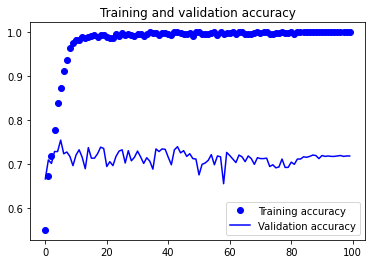

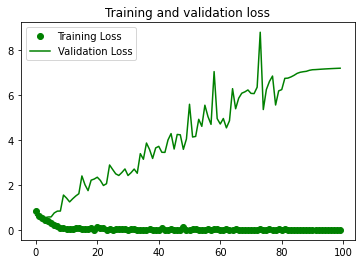

In [ ]:
import matplotlib.pyplot as plt

acc = history.history['accuracy']
val_acc = history.history['val_accuracy']
loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = range(len(acc))

plt.plot(epochs, acc, 'bo', label='Training accuracy')
plt.plot(epochs, val_acc, 'b', label='Validation accuracy')
plt.title('Training and validation accuracy')
plt.legend()

plt.figure()

plt.plot(epochs, loss, 'go', label='Training Loss')
plt.plot(epochs, val_loss, 'g', label='Validation Loss')
plt.title('Training and validation loss')
plt.legend()

plt.show()

Matplotlib 라이브러리를 이용해서 훈련 과정에서 에포크에 따른 정확도와 손실을 출력

20회 에포크에서 훈련 정확도는 1.0에 근접한 반면, 테스트의 정확도는 100회 훈련이 끝나도 0.7 수준에 머물고 있습니다.

이러한 현상을 **과적합 (Overfitting)** 이라고 함.


# 테스트 이미지 분류하기
훈련된 모델이 개와 고양이 이미지를 분류할 수 있는지 확인

In [ ]:
import numpy as np
from google.colab import files
from keras.preprocessing import image

uploaded=files.upload()

for fn in uploaded.keys():

  path='/content/' + fn
  img=image.load_img(path, target_size=(150, 150))

  x=image.img_to_array(img)
  x=np.expand_dims(x, axis=0)
  images = np.vstack([x])

  classes = model.predict(images, batch_size=10)

  print(classes[0])

  if classes[0]>0:
    print(fn + " is a dog")
  else:
    print(fn + " is a cat")

위 코드는 하나 이상의 이미지를 업로드하고, 훈련된 모델을 사용해서 개/고양이 분류 결과를 출력하는 코드